<a href="https://colab.research.google.com/github/Mikolaj-Bochenek/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Recognition**

Skład sekcji: Wojciech Bębenek i Mikołaj Bochenek ISK2

### **Wprowadzenie**

Celem tego projektu jest utworzenie AI zdolnej do rozpoznawania ręcznie napisanych cyfr, zarówno tych gotowych jak i utowrzonych przez nas

### **Zestaw danych**

Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

### **1. Opis oraz import bibliotek**

In [ ]:
# Update: Należy zainstalować dokładnie wersję 2.0
# Na wersji 2.0 funkcja compile działa poprawnie
# naprawia to error: TypeError: Invalid keyword argument(s) in `compile`: {'optimizers'}
!pip install gast==0.2.2
!pip install -q tensorflow==2.0

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=7abd4b3d98da9160c12046a13511c9a499b46e4f753549b64280529c2dff7dce
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
     |████████████████████████████████| 86.3MB 66kB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 3.8MB 44.6MB/s 
     |████████████████████████████████| 450kB 36.4MB/s 


**NumPy** jest biblioteką dla języka Python zawierającą podstawowe narzędzia do obliczeń numerycznych. Pod powierzchnią wykorzystuje kompilowane biblioteki napisane w C, C++ i Fortranie.

**Pandas** - jest podstawowym pakietem służącym do przetwarzania i analizy danych w języku Python. Oparty na NumPy. Pandas świetnie nadaje się do pracy ze wszelkiego rodzaju samymi tabelarycznymi.

**Matplotlib** – biblioteka do tworzenia wykresów dla języka programowania Python i jego rozszerzenia numerycznego NumPy. Zawiera ona API "pylab" zaprojektowane tak aby było jak najbardziej podobne do MATLABa, przez co jest łatwy do nauczenia przez jego użytkowników.

**Plotly** – biblioteka do interaktywnej wizualizacji danych. Pozwala śledzić każdy punkt wartości na wykresie.

**Tensorflow** to open-source'owy framework stworzony przez Google'a do obliczeń numerycznych. Oferuje on zestaw narzędzi służących do projektowania, trenowania oraz douczania (ang. fine-tuning) sieci neuronowych.

**Keras** – biblioteka Open Source do tworzenia sieci neuronowych, wykorzystuje ona TensorFlow lub Theano jako backend, w którym wykonywane są operacje, ponieważ Keras sam w sobie stara się uprościć działanie tych dwóch kombajnów, w których wykonują się algorytmy i zwracane są nam ich wyniki.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.0.0


### **2. Załadowanie i przygotowanie danych**

Do załadowania danych wykorzystujemy wcześniej zaimportowaną funkcję load_data. Dane te przypisujemy od razu do zbioru treningowego i testowego oraz sprawdzamy rozmiar danych.

60000 - liczba próbek zbioru treningowego

28, 28 - rozmiar obrazu 28 x 28

60000 - liczba etykiet treningowych

analogicznie dla danych testowych

In [ ]:
(x_training, y_training), (x_test, y_test) = load_data()

print(f'X Training shape: {x_training.shape}')
print(f'Y Training shape: {y_training.shape}')
print(f'X Test shape: {x_test.shape}')
print(f'y Test shape: {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
X Training shape: (60000, 28, 28)
Y Training shape: (60000,)
X Test shape: (10000, 28, 28)
y Test shape: (10000,)


**Pierwsza próbka zbioru treningowego**

Jest to tablica wymiaru 28x28, każdy piksel przedstawia wartość numeryczną - im wyższa liczba tym wyższa intensywność koloru.

In [ ]:
print(x_training[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

**Rozmiar pierwszej próbki**

In [ ]:
print(f'X Training 1 shape: {x_training[0].shape}')

X Training 1 shape: (28, 28)


**Standaryzacja danych**

Dane przed przekazaniem do modelu należy wystandaryzować, aby wyeliminować skrzywienie (bias).

Całą tablice dzielimy przez 255 ponieważ jest to najwyższa wartość, a więc wartości wynikowe będa z przedziału 0-1.

In [ ]:
x_training = x_training / 255.
x_test = x_test / 255.

print(f'Data is standarized')

Data is standarized


### **3. Eksploracja danych**

Wyświetlenie pierwszej próbki jako obraz 28 x 28, w tym celu wykorzystamy bibliotekę **matplotlib** 

(-0.5, 27.5, 27.5, -0.5)

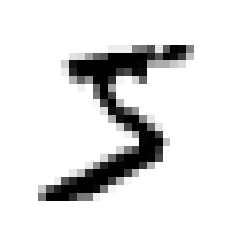

In [ ]:
plt.imshow(x_training[0], cmap='gray_r')
plt.axis('off')

Wyświetlenie 10 próbek jako obraz 28x28 wraz z etykietami

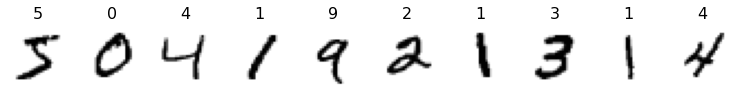

In [ ]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(x_training[i-1], cmap='gray_r')
    plt.title(y_training[i-1], color='black', fontsize=16)
plt.show()

## **4. Budowa sieci neuronowej**

W tym celu należy utworzyć instancję klasy **Sequental**,
następnie metodą add dodajemy warstwy (w ostatniej warstwie liczba jednostek musi odpowiadać liczbie klas oraz odpowiednią funkcję aktywacji)

Model należy skompilować podając **optymalizator**, **funkcję straty** oraz **metrykę** względem której będziemy sprawdzać jak dobrze nasz model działa na zbiorze walidacyjnym.

Metoda **Summary()** wyświetli budowę naszego modelu

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizers='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## **5. Trenowanie modelu**

Trenujemy model metodą fit oraz przyporządkowujemy wynik modelu do zmiennej history.

Parametr epochs mówi o krotności rzejsza całego zbioru przez naszą sieć.

In [ ]:
history = model.fit(x_training, y_training, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2903 - accuracy: 0.9150
Epoch 2/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1541 - accuracy: 0.9549
Epoch 3/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1255 - accuracy: 0.9643
Epoch 4/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1109 - accuracy: 0.9682
Epoch 5/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1022 - accuracy: 0.9722


## **6. Ocena modelu**

Podczas testowania używamy innych danych niż podczas trenowania, uzywamy danych których model jeszcze nie widział.

Ten wynik, który tutaj uzyskamy jest wynikiem rzeczywistym.

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.0482 - accuracy: 0.9747


[0.09594096068874933, 0.9747]

Przy pomocy biblioteki **pandas** i obiektu **DateFrame** budujemy metryki naszego trenowania - atrybut history zawiera dane trnowania.

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.290320,0.915000
1,0.154061,0.954883
2,0.125527,0.964350
3,0.110858,0.968200
4,0.102205,0.972183


Dzięki danym historycznym oraz bibliotece **plotly** jesteśmy w stanie utworzyc wykres z danymi jak wyglądał proces trenowania

Funkcję straty chcemy minimalizować.
Dokładnośc chcemy jak największą.

Z epoki na epoke ta metryka się poprawia.

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

## **7. Predykcja na podstawie modelu**

Predykcja zbioru testowego z użyciem metody **predict**

Tablica array zawiera prawdopodobieństwa przynależności do danej klasy (domyślnie **numpy** wyświetla 3 pierwsze kolumny)

In [ ]:
model.predict(x_test)

array([[0.000000000008, 0.            , 0.000000005885, ..., 0.9999995     , 0.000000000003, 0.000000006282],
       [0.            , 0.000000000004, 1.            , ..., 0.            , 0.000000000029, 0.            ],
       [0.000000026032, 0.9998171     , 0.000039563685, ..., 0.00010028728 , 0.000028103672, 0.000000055631],
       ...,
       [0.            , 0.000000000057, 0.000000000041, ..., 0.00000929032 , 0.000001281632, 0.00007629932 ],
       [0.000000000016, 0.000000000001, 0.            , ..., 0.            , 0.000001055907, 0.            ],
       [0.            , 0.            , 0.000000000002, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

Predykcja zbioru testowego z uzyciem metody **predict_classes**

teraz jesteśmy w stanie zobaczyć numer klasy do którego należy nasza próbka

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Kolejny **DateFrame** gdzie wrzucimy wartości prawdziwe **y_test** i **y_pred** oraz wyświetlimy pierwsze 10 wierszy

In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


Szukanie błędów i wyświetlanie indexów w których zaszły.

In [ ]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([247, 259, 321, 340, 381, 403, 445, 447, 495, 582], dtype='int64')

Wyświetlenie obrazków w których zaszła pomyłka.

**y_test** - wartość prawdziwa (etykieta)

**y_pred** - wartośc przewidziana

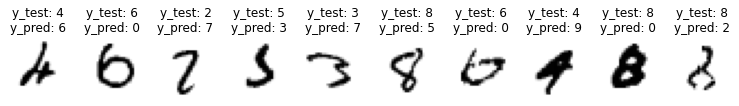

In [ ]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(x_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()